#### Import packages ...

In [1]:
import sys
import matplotlib 
import matplotlib.patches as mpatches
import matplotlib.transforms as mtransforms
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.patches import FancyBboxPatch
import numpy as np
import networkx as nx

sys.path.append('../utils/')
sys.path.append('../libs/')
from curvygraph import *
from utils import rcPhysRev, c8, draw_process_motif, boldfont, sim

#### Set fonts for figures ...

In [2]:
%%capture
# some matplotlib configs to make labels pretty
rcPhysRev()

# define some font types
fontstandard= FontProperties()
fontbold = boldfont()

#### Define some functions for drawing figure elements ...

In [4]:
def drawGraph2(c, r, ax=None, colors=None, G=None, nodesize=300, arrowsize=20, 
    width=2, ec='k', aspect=1, nodepad_x=0.05, nodepad_y=0.1, rectangular=False, 
    draw=True, hide_edges=False):
    if ax is None:
        ax = plt.gca()
    if G is None:
        G = nx.DiGraph()
        G.add_nodes_from(range(3))
        G.add_edges_from([(0,1),(1,2),(2,0)])
    if colors is None: 
        colors = ['#022957','#ff8000','#6e6e6e']

    # make a dummy graph
    D = nx.Graph()
    D.add_edge(0,0)

    # make list of node positions
    cos30, sin30 = np.sqrt(3)/2, 1/2
    pos_arr = np.array([[0,1],[cos30,-sin30],
                        [-cos30,-sin30]])
    pos_arr[:,1] = pos_arr[:,1]*aspect
    pos_arr = np.array(c)+r*pos_arr
    
    if draw:
        
        # plot empty circle
        nx.draw_networkx_nodes(D, 
            pos={0: (0+c[0],0*aspect+c[1])}, 
            node_color='white', linewidths=1, edgecolors=ec, 
            node_size=nodesize)        

        # draw nodes
        for i in range(3):
            nx.draw_networkx_nodes(D, 
                pos={0: pos_arr[i]}, 
                node_color=colors[i], linewidths=1, edgecolors=ec, 
                node_size=nodesize)

        ecolor = 'k'
        nx.draw_networkx_edges(G, pos={i: pos_arr[i] for i in range(3)}, 
                               width=width, arrowsize=arrowsize,
                               node_size=nodesize, edge_color=ecolor)
    return(G, pos_arr)

In [6]:
def drawGraph3(c, r, ax=None, colors=None, G=None, nodesize=300, arrowsize=20, 
    width=2, ec='k', aspect=1, nodepad_x=0.05, nodepad_y=0.1, rectangular=False, 
    draw=True, hide_edges=False):
    num_nodes = 5
    if ax is None:
        ax = plt.gca()
    if G is None:
        G = nx.DiGraph()
        G.add_nodes_from(range(num_nodes))
        G.add_edges_from([(1,0),(2,0),(1,2),(3,0), (4,0), (3,4)])
    if colors is None: 
        colors = ['#ff8000','#022957','#6e6e6e']

    # make a dummy graph
    D = nx.Graph()
    D.add_edge(0,0)

    # make list of node positions
    cos30, sin30 = np.sqrt(3)/2, 1/2
    pos_arr = np.array([[0,0],[cos30,-sin30], [cos30,sin30],
                        [-cos30,-sin30], [-cos30,sin30]])
    pos_arr[:,1] = pos_arr[:,1]*aspect
    pos_arr = np.array(c)+r*pos_arr
    
    if draw:
        
        # draw nodes
        for i in range(num_nodes):
            nx.draw_networkx_nodes(D, 
                pos={0: pos_arr[i]}, 
                node_color=colors[int(bool(i))], linewidths=1, edgecolors=ec, 
                node_size=nodesize)

        ecolor = 'k'
        nx.draw_networkx_edges(G, pos={i: pos_arr[i] for i in range(num_nodes)}, 
                               width=width, arrowsize=arrowsize,
                               node_size=nodesize, edge_color=ecolor)
    return(G, pos_arr)

#### Draw motifs ...
(These figures do not appear in the paper. I just use them in some presentations.)

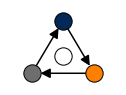

In [5]:
plt.figure(figsize=(2,1.5))
ax = plt.subplot(111)
ax.axis('off')
r = 0.25
rr = 0.2
aspect=1.5
nodesize=300
rectangular=True
drawGraph2((0.9,-0.5), rr, arrowsize=20, nodesize=nodesize, 
          width=1.5, aspect=2, hide_edges=False) 
xlim = ax.get_xlim()
ax.set_xlim(xlim[0]-0.1,xlim[1]+0.1)
ylim = ax.get_ylim()
ax.set_ylim(ylim[0]-0.1,ylim[1]+0.1)
plt.savefig('../figures/feedback_motif.pdf')

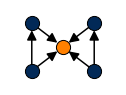

In [7]:
plt.figure(figsize=(2,1.5))
ax = plt.subplot(111)
ax.axis('off')
r = 0.25
rr = 0.2
aspect=1.5
nodesize=200
rectangular=True
drawGraph3((0.9,-0.5), rr, arrowsize=20, nodesize=nodesize, 
          width=1.5, aspect=2, hide_edges=False) 
xlim = ax.get_xlim()
ax.set_xlim(xlim[0]-0.1,xlim[1]+0.1)
ylim = ax.get_ylim()
ax.set_ylim(ylim[0]-0.1,ylim[1]+0.1)
plt.savefig('../figures/mff_motif.pdf')